# Chapter 7: Continuous Optimization

机器学习模型的训练其实就是寻找‘好参数’的过程，而目标函数的取值或者概率模型则体现了参数的的好坏。本章主要介绍如何通过优化算法寻求目标函数的最优值进而为机器学习模型找到‘好参数’。

**本章主要内容**：
* 无约束优化 
* 约束优化
* 凸优化


 ## 7.1 Optimization Using Gradient Descent

对于简单的低阶一元（二元）函数，我们可以通过对未知数求导并令导数为零的方法来求函数的最值。但是机器学习模型的目标函数通常是高阶并且含有多个未知数的，直接 `analytically` 地解出目标函数的最值是很困难的，通常我们以某一点开始沿着负（正）梯度的方向一步一步的向着最小（大）值逼近， 这就是梯度下降（上升）算法。

假设实数函数 $f: R^d \rightarrow R$ 是我们机器模型的目标函数且处处可微分， 我们想要求 $f$ 的最小值：
$$\min_x f(x)$$

如果$f(x)$ 是多元函数，一个球正位于$f(x)$所描绘的平面上的一点$x_0$ 处， 如果球被释放 它则会沿着下降最快的方向朝谷底滑去。 我们已经学过函数在某点的梯度（gradient）指向了函数值增加最快的方向，所以我们可以在现在所处点的基础上减去一定比例 $\gamma$（learning rate)的梯度 $-((\nabla f)(x_0))^T$，这样就可以到达函数值更加小的点 $x_1$。

$$x_1 = x_0 - \gamma ((\nabla f)(x_0))^T \\ f(x_1) \le f(x_0) $$

梯度下降算法可以总结为：
如果我们想要找到函数$f:R^n \rightarrow R, x\rightarrow f(x)$的局部最小值$f(x_*)$, 我们可以从初始点$x_0$ 开始迭代计算:
$$x_{i+1} = x_i - \gamma_i((\nabla f)(x_i))^T$$
对于合适的$\gamma_i$, 我们可以得到 $f(x_0)\ge f(x_1)\ge \cdots$, 直到函数值收敛于某一局部最小值。 

注：
* 这里我们用行向量来表示梯度
* 如果目标函数是凸函数， 局部最小值就是全局最小值


### 7.1.1 Step-size

这里 `Step-size` 就是我们所熟知的学习率（learning rate）， 如果 Step-size 太小了， 算法收敛会比较慢； 但如果 Step-size 太大了， 有可能会导致无法收敛于局部最小值甚至发散。

以下是两种简单的启发式规则：
* 如果在梯度更新后函数值反而增加， 那么很可能 Step-size 偏大， 我们取消前一步的梯度更新， 把 Step-size 调小后再进行梯度更新
* 如果在梯度更新后函数值降低了， 那么我们可以把 Step-size 再稍微调大写， 在进行梯度更新

注：
* 当我们把梯度下降算法应用于求解线性方程 $Ax=b$ 时，收敛速度可能会比较慢。 收敛速度依赖 `condition number` $\mathcal{K} = \frac{\sigma(A)_{max}}{\sigma(A)_{min}}$, 分子分母分别代表了矩阵 $A$的最大奇异值和最小奇异值。 有时候为了提高收敛速度， 我们会在方程左右两同乘 $P^{-1}$ 保证 $P^{-1}A$ 的 condition number 比较大 前提是 $P^{-1}$ 易于计算。 我们把矩阵 $P$ 叫做 `preconditioner`。 

### 7.1.2 Gradient Descent with Momentum

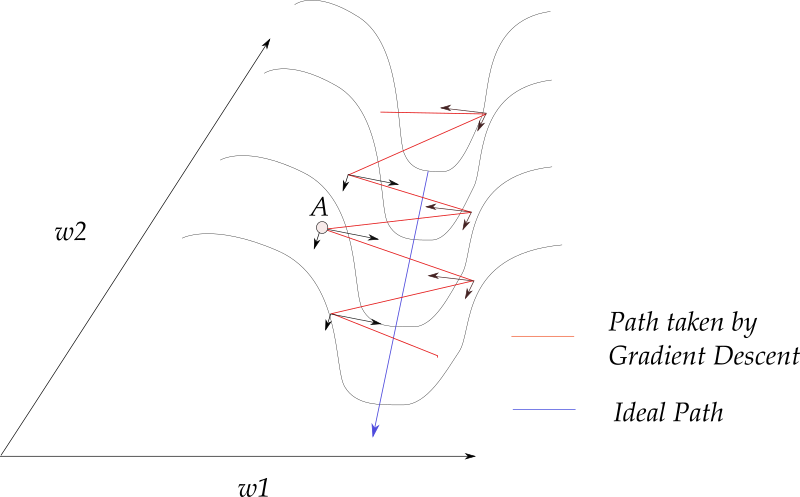 

如图所示， 当函数图形乘狭长山谷状时， 小球可能会在山谷两壁间震荡， 梯度下降法会收敛的很慢。 可行的解决办法之一就是赋予梯度下降算法一些`记忆`。 

动量梯度下降算法， 在原有梯度下降算法的基础上引入了上次 $x$的更新量：

$$x_{i+1} = x_i - \gamma_i((\nabla f)(x_i))^T + \alpha\Delta x_i \\ \Delta x_i = x_i - x_{i-1} = \alpha \Delta_{i-1} - \gamma_{i-1}(\nabla f)(x_{i-1}))^T， \alpha\in[0, 1]$$

比较形象的比喻就是 我们给球增加了重量， 当球想从山谷一侧返回另一侧时， 因为其自身质量增加， 垂直于山谷两壁的方向改变会更加困难， 因此小球会更多的保持往山谷低处走的分量， 而非在山谷两侧震荡。 

参考网站:

* https://distill.pub/2017/momentum/ 
* https://blog.paperspace.com/intro-to-optimization-momentum-rmsprop-adam/ （图片出处）

### 7.1.3 Stochastic Gradient Descent

在机器学习中， 假设有 $n=1, 2, ..., N$ 个数据点， 通常我们把模型在每个数据点处的损失的和作为目标函数:

$$L(\theta) = \sum_{n=1}^NL_n(\theta)$$

我们的目标就是找到最优 $\theta$ 来最小化目标函数。 
比如在回归模型中， 我们经常使用 `negative log-likelihood` 的和 来最为目标函数：

$$L(\theta) = -\sum_{n=1}^N logp(y_n|x_n, \theta)$$

标准的梯度下降算法按下面的公式在全部训练数据上更新参数：

$$\theta_{i+1} = \theta_i - \gamma_i(\nabla L(\theta_i))^T = \theta_i - \gamma_i\sum_{n=1}^N(\nabla L_n(\theta_i))^T$$

但是如果训练集比较大而且 $L_n$ 的梯度计算比较困难时， 标准梯度下降算法将会十分耗时。 

因此我们只随机选取一小部分（mini-batch)的 $L_n$ 计算梯度以降低计算时间。我们称这种算法为 随机梯度下降法`SGD`, 虽然我们不知道准确的梯度，但是我们知道真正梯度的近似值。  极端情况时只选取一个 $L_n$ 来估计梯度。  

下面解释下为什么这么做估计是合理的:  
为了使梯度收敛， 我们只需找到一个真正梯度的无偏估计量。 实际上 full-batch 梯度下降法的参数更新公式中 $\sum_{n=1}^N(\nabla L_n(\theta_i))^T$
也是对真正梯度的估计。 选取一部分的数据计算梯度也是对真正梯度的一种无偏估计， 也能保证梯度收敛。 类似， 我们也使用样本平均来估计实际平均。 


如果使用 large batch 训练： 

* 对梯度的预测更精确，减少更新参数时的方差， 使学习更稳定
* 计算太费时


如果使用 small batch 训练:  

* 对梯度预测产生的noise有助于脱离一些不好的局部最小值
* 计算比较快

## 7.2 Contrained Optimization and Lagrange Multipliers

这一节我们在上一节求解函数最小值的问题上引入约束条件:

$$\min_x f(x) \\ \text{s.t. } g_i(x)\le 0, i=1, ..., m$$

注：函数 $f: R^D \rightarrow R, g_i: R^D \rightarrow R$ 可能并非是凸函数， 我们将在下一节详细讨论当 $f， g_i$ 是凸函数的情况。 

利用`indicator function` 我们可以上述约束条件转化为无约束条件优化问题：
$$J(x) = f(x) + \sum_{i=1}^m1(g_i(x)) \\1(z) = \begin{cases} 0 \text{,  if $z \le 0$} \\ \infty \text{, otherwise}\end{cases}$$

但是新引入的 `inifinite step function` 函数 $1(z)$ 同样很难优化。 

延续上面的思想：约束条件没有被满足就增加惩罚， 我们引入拉格朗日乘数 (`Lagrange multipliers`) 来解决遇到的问题。 拉格朗日乘数法的想法是将上述转化中引入的 inifinite step function 换为线性函数:

$$\mathcal{L}(x, \lambda) = f(x) + \sum_{i=1}^m \lambda_ig_i(x), \lambda_i \ge 0 \\= f(x) + \lambda^Tg(x), \lambda \in R^m$$

优化问题中的对偶是指将一个有关 $x$ (原来变量） 变量的问题转化为一个有关 $\lambda$（对偶变量）的问题， 采用拉格朗日乘数法后 我们可以将原问题（primal problem) 转化为其朗格朗日对偶问题：

$$\max_{\lambda\in R^m} \mathcal{D}(\lambda) \\ \text{s.t. } \lambda \ge 0$$

这里的 $\lambda$ 就是对偶变量， $\mathcal{D}(\lambda) = \min_{x\in R^d} \mathcal{L}(x, \lambda)$

注：  
* `minimax inequality`: $\max_y \min_x \phi(x, y)\le \min_x \max_y \phi(x, y)$, 可以用$\min_x \phi(x, y) \le \max_y \phi(x, y)$ 证明。
* `weak duality`: 原始值（primal values）总是大于或等于对偶值（dual values）

下面是对 weak duality 的一个证明: 

目标函数 $\mathcal{L}(x, \lambda)$ 和 $J(x)$ 的差异在于拉格朗日乘数法将 inifinite step function 松弛为了线性函数。 因此当 $\lambda\ge 0$ 时， $\mathcal{L}(x, \lambda)$ 是 $J(x)$ 的下界(lower bound)。 所以我们有 

$$J(x) = \max_{\lambda\ge 0} \mathcal{L}(x, \lambda)$$

原问题是为了最小化 $J(x)$, 因此可以得到

$$J(x) = \min_{x\in R^d}\max_{\lambda\ge 0} \mathcal{L}(x, \lambda)$$

根据 minimax inequality 我们可以得到 

$$J(x) = \min_{x\in R^d}\max_{\lambda\ge 0} \mathcal{L}(x, \lambda) \ge \underline {\max_{\lambda\ge 0} \min_{x\in R^d} \mathcal{L}(x, \lambda)}$$

画线部分其实就是我们构建的原问题的拉格朗日对偶， 可以看出来原始值总是大于或等于对偶值。 

再从到到尾捋一下：  
因为约束条件会大大增加解决问题的难度，我们通过拉格朗日乘数法， 将原问题构建成了拉格朗日对偶：

$$\max_{\lambda\ge 0} \min_{x\in R^d} \mathcal{L}(x, \lambda)$$

$\min_{x\in R^d} \mathcal{L}(x, \lambda)$ 是无约束条件问题， 如果它很容易解的话，那我们新构建的问题解起来也会容易许多。 而且从 $\mathcal{L}(x, \lambda) = f(x) + \lambda^Tg(x)$ 我们可以看出 $\mathcal{L}(x, \lambda)$ 是 关于 $\lambda$ 的一个仿射变换， 因此 $\min_{x\in R^d} \mathcal{L}(x, \lambda)$ 其实是 关于 $\lambda$ 的 仿射函数的 逐点最小值。 也就是说即使 $f(\cdot)$ 和 $g(\cdot)$ 可能是非凸函数， $\mathcal{D}(\lambda)$ 也是凹的。 而对偶问题外侧针对 $\lambda$ 的最大化问题， 其实就是对凹函数求最大值， 是十分容易解决的。 

注：

如果有等式制约条件， 我们可以把等式制约条件化为两个不等式条件。 比如： $h_j(x)=0$ 可以化为 $h_j(x)\le 0, h_j(x) \ge 0$


## 7.3 Convex Optimization

如果 $f(\cdot)$ 是凸函数 和 约束条件 $g(\cdot), h(\cdot)$ 都是凸集， 那么这种优化问题就叫凸优化， 它的好处就是可以保证全局最优值。 如果我们对这种问题构建对偶问题， 那么我们可以保证 `strong duality` : 对偶问题的最优解等同于原始问题的最优解。 

先了解几个重要的定义：

**Convex set**: 集合 $\mathcal{C}$ 是凸集， 如果对于属于它的任何 $x, y \in \mathcal{C}$ 和任何标量 $\theta, 0\le \theta \le 1$ 有：

$$ \theta x + (1-\theta) y \in \mathcal{C}$$

**Convex function**: 函数 $f: R^D \rightarrow R$ 是凸函数，如果它的定义域是凸集， 并且对于任意其定义域内两点 $x, y$ 和任何标量 $\theta, 0\le \theta \le 1$ 有：

$$ f(\theta x + (1-\theta) y) \le \theta f(x) + (1-\theta) f(y)$$

**Epigraph**: 其实就是凸函数上面的区域（一定是凸集） 
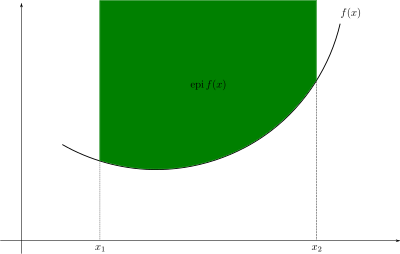

注：
* 凸函数两点之间的连线在函数之上
* 凹函数就是负的凸函数 
* https://en.wikipedia.org/wiki/Epigraph_(mathematics) （图片出处）

如果函数 $f: R^n \rightarrow R$ 是可微分的， 我们可以用梯度来看它是否具有凹凸性。 如果下式成立， 函数 $f(x)$ 就是凸的：

$$f(y) \ge f(x) + \nabla_x(fx)^T(y-x)$$
我个人对这个不等式的理解是： $f(x)$ 加上 $y-x$ 以 $\nabla_x(fx)^T$ 为梯度的增长量后仍不大于 $f(y)$, 如果用二维坐标解释的话就是 $f(x)$ 加上 $y-x$ 以 $\nabla_x(fx)^T$ 为斜率的增长量, 也就是点 $x$ 处的切线在点 $y$ 处的取值仍不大于函数值在点 $y$ 处的取值。   
如果函数 $f(x)$ 是二次可微的， 也就是说它具有 Hessian 矩阵， 那么如果 $\nabla_x^2f(x)$ 是半正定的， 函数 $f(x)$ 就是凸函数， 例如 $f(x)=x^2$。 

凸函数间的非负权重和也是凸函数。 下面简单的给出证明： 
如果 $f_1, f_2$ 是凸函数， 那么根据凸函数性质可得
$$ f_1(\theta x + (1-\theta) y) \le \theta f_1(x) + (1- \theta) f_1(y) \\ \ f_2(\theta x + (1-\theta) y \le \theta f_2(x) + (1- \theta) f_2(y) )$$
把两式左右两边相加可得
$$ f_1(\theta x + (1-\theta) y) + f_2(\theta x + (1-\theta) y) \le \theta f_1(x) + (1- \theta) f_1(y) +\theta f_2(x) + (1- \theta) f_2(y)\\ f_1(\theta x + (1-\theta) y) + f_2(\theta x + (1-\theta) y) \le \theta (f_1(x) + f_2(x)) + (1-\theta) (f_1(y)+f_2(y))$$

所以 $f_1(\cdot) + f_2 (\cdot)$ 是凸函数, 也就是说两个凸函数相加也得凸函数。又因为凸函数乘以一个非负标量也是凸函数, 所以 $\alpha f_1(\cdot) + \beta f(\cdot), \alpha, \beta \ge 0$ 也是凸函数。 

**Jensen's inequality**: $ f(\theta x + (1-\theta) y) \le \theta f(x) + (1-\theta) f(y)$ 有时被称为 Jensen's inequality, 但其实任意凸函数的非负权重和对应的不等式都可以叫做 Jensen's inequality。 

总结一下， 具有以下形式的约束优化问题成为凸优化问题:

$$\min_x f(x) \\ \text{s.t. }g_i(x) \le 0, i = 1, ..., m \\ h_j(x)=0, j=1, ..., n$$

其中 $f(x), g_i(x)$ 是凸函数， $h_j(x) = 0 是凸集$。 

接下来我们介绍两类经常遇到的凸优化问题

* Linear programming
* Quadratic programming

### 7.3.1 Linear Programming

如果上述函数 $f(\cdot), g_i(\cdot)$ 是线性函数的话， 那么我们的优化问题如下：

$$\min_{x\in R^d} c^Tx \\ \text{s.t. } Ax \le b, A\in R^{m\times d}, b\in {R^m}$$

这种问题被成为线性规划(linear program)。 我们可以写出线性规划问题的 Lagrangian:

$$\mathcal{L}(x, \lambda) = c^Tx + \lambda^T(Ax-b) = (c + A^T\lambda)x - \lambda^Tb , \lambda \in R^m$$

因为我们得求 $\min_{x\in R^d}\mathcal{L}(x, \lambda)$ 的最小值， 所以我们对$x$求导，然后令导数为0 可得:
$$c + A^T\lambda = 0$$ 

我们得到 dual Lagrangian: $\mathcal{D}(\lambda) = \min_{x\in R^d}\mathcal{L}(x, \lambda) = -\lambda^Tb$

最终原始问题可化为以下对偶问题：

$$\max_{\lambda\in R^m} -b^T\lambda \\ \text{s.t. } c + A^T\lambda = 0 \\ \lambda \ge 0$$

注：
* 我们得到的对偶问题也是具有 $m$ 个变数的线性规划问题， 我们可以根据 $m$ 和 $d$ 的大小来选择是解决原始问题还是对偶问题。 $m$ 是原问题中约束条件的个数, $d$ 是原始问题中变数的个数


### 7.3.2 Quadratic Programming

二次规划 (Quadratic programming)的形式如下：

$$\min_{x\in R^d} \frac{1}{2}x^TQx + c^Tx \\ \text{s.t. } Ax\le b$$

目标函数是凸二次函数 ($Q\in R^{d\times d}$ 是正定的)， 其中 $ A\in R^{m\times d}, b\in R^m, c\in R^d$。 上面的问题有 $d$ 个变数， $m$ 个线性约束式。 

运用拉格朗日乘数法将约束条件引入目标函数，我们可得出上述问题的 Lagrangian 如下:

$$\mathcal{D}(\lambda) = \frac{1}{2}x^TQx + c^Tx  + \lambda^T(Ax-b) = \frac{1}{2}x^TQx + (c+A^T\lambda)^Tx - \lambda^Tb $$

同样， 我们得求 $\min_{x\in R^d}\mathcal{L}(x, \lambda)$ 的最小值， 所以我们对$x$求导，然后令导数为0 可得:

$$\frac{1}{2}Qx +c + A^T\lambda = 0 \rightarrow x = - Q^{-1} (c + A^T\lambda)$$ 

把那么 $x = - Q^{-1} (c + A^T\lambda)$ 代入 Lagrangian中 可得dual Lagrangian 为：
$$\mathcal{D}(\lambda) = -\frac{1}{2} (c+A^T\lambda)^TQ^{-1}(c+A^T\lambda) - \lambda^Tb $$

所以最终原始问题化为以下对偶问题:

$$\max_{\lambda\in R^m}  -\frac{1}{2} (c+A^T\lambda)^TQ^{-1}(c+A^T\lambda) - \lambda^Tb \\ \text{s.t. } \lambda \ge 0$$

在第十二章我们将会看到二次规划在机器学习中的应用

### 7.3.3 Legendre-Fenchel Transform and Convex Conjugate

**支撑超平面**：当一个超平面满足下列两个条件时称其为某个凸集的支撑超平面
    1. 和凸集相交
    2. 凸集只在超平面的某一侧
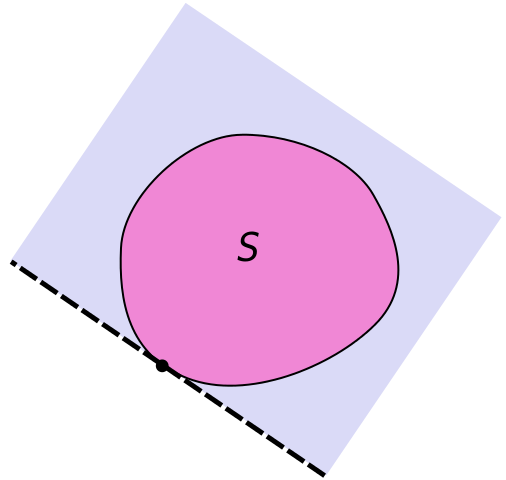

图中虚线就是凸集合 $S$ 的支撑超平面

我们可以用凸集的支撑超平面来描述凸集， 而我们在上节已经提到凸集其实是可以通过凸函数的上图像得到的。因此我们可以通过支撑超平面来描述凸函数。其实我们可以发现支撑超平面合凸函数是相切于一点的。 函数 $f(x)$ 在 $x_0$ 的切线斜率就是 函数$f(x)$在$x_0$ 处的梯度 $\frac{df(x)}{dx}|_{x=x_0}$。 

说下我自己的理解：
因为凸集其实就是凸函数的上图像， 而凸集的支撑超平面又是和凸集相切的， 所以其实凸集的支撑超平面也可以用来描述凸函数。 

总而言之， 因为凸集可以由它的支撑超平面描述， 那么同样凸函数也可以由他们的梯度函数描述。 Legendre-Fenchel Transform 使这个概念更加正式化。

注：
* https://en.wikipedia.org/wiki/Supporting_hyperplane#:~:text=In%20geometry%2C%20a%20supporting%20hyperplane,boundary%2Dpoint%20on%20the%20hyperplane. (图片出处)

接下来我们正式探讨下 Legendre-Fenchel Transform 这个概念。 

**Legendre-Fenchel Transform**: 是把可微凸函数 $f(x)$ 变为依靠于切线的函数$s(x) = \nabla_x(fx)$的一种变换 （类似于傅里叶变换那种）

注:
* Legendre-Fenchel Transform 是对函数 $f(\cdot)$的变换, 不是对变量 $x$的变换， 也不是对函数在 $x$处的函数值的变换。 
* Legendre-Fenchel Transform 也被成为 convex conjugate

**Convex Conjugate**: 函数 $f: R^D \rightarrow R$ 的 convex conjugate 是形如下的方程 $f^*$

$$f^*(s) = \sup_{x\in R^D} (\left<s, x \right > - f(x))$$

注：
* 以上对 convex conjugate 的定义并不要求 函数 $f$ 是凸函数或可微。 
* 定义中使用了一般的内积， 为了讨论方便， 以下使用点积 $\left<s, x \right> = s^Tx$

下面举个例子说明下 convex conjugate 定义式的几何意义。 

假设有函数 $f(x) = x^2$, 因为我们考虑的是二维平面， 那么超平面就降维成一条线。 设有直线 $y=sx + c$。 因为凸函数可以由他们的支撑超平面描述， 接下来我们就尝试用 函数 $f(x)$ 的支撑线（其实就是切线）来描述它。 我们使直线 $y$ 的梯度 $s$ 固定不变， 然后在函数图像上的每个点 $(x_0, f(x_0))$ 处， 找到能使直线和函数图像相切于 $(x_0, f(x_0))$ 的最小 $c$。 那么这条直线的式子可以写为(点斜式)：

$$y-f(x_0) = s(x-x_0)$$

直线和 $y$ 轴的截距就是 $-sx_0 + f(x_0)$, 其实就是 $c$, 因此 $c$ 的最小值的表达式可写为

$$\inf_{x_0} -sx_0 + f(x_0)$$

先前对 convex conjugate 的定义就是上式的相反数。 

注： 

可微凸函数和其 Legendre-Fenchel Transform 是一对一对应关系。 比如 对于一个 可微凸函数， 那么其在 $x_0$ 处的切线方程为：

$$f(x_0) = sx_0 + c$$

我们想通过凸函数的梯度 $\nabla_x f(x)$ 来表示它， 其中 $s = \nabla_{x_0} f(x_0)$。

$$-c = sx_0 - f(x_0)$$

因为 $-c$ 随着 $x_0$ 变化， 也就是说它随着 $s$ 变化 所以我们可以把 $-c$ 当作一个关于 $s$ 的函数 $f^*$:

$$f^*(s) = sx_0 - f(x_0)$$

可以看出这是 convex conjugate 定义式的一种特殊例子， 因为原式中我们未要求 函数 $f$ 是凸函数或可微

conjugate 函数有很多奈斯的性质， 比如 我们对 conjugate 函数再次进行 Legendre-Fenchel Transform， 那么我们就可以得到原函数。 


这在机器学习中有哪些应用呢？

如果我们对目的函数的优化是凸优化问题的话， 我们可以求目的函数的 conjugate， 那么求得的 conjuate loss 函数可能会更容易方便我们对其进行优化。 
